[4.042933591118449, 3.900147851525745, 1.8074812156355824, 4.014346636758493, 0.49201113067481866, 0.014697684912619411, 5.116929475757894, 0.7613395109182691, 0.16464119053947213, 0.24681411899592462, 4.218455396613697, 0.6397584322585779, 0.024404032567278387, 0.5311882533275571, 0.07329179135558139, 3.7972570474086687, 0.8742498126925546, 0.15500291123075383, 0.37340580750933583, 0.14224397820774176, 0.5104481808685184, 3.6040786670670326, 1.335746008580378, 1.0267183301183944, 2.1654413244152915, 1.1974037818445646, 1.0662321178944165, 5.0850624898094345]


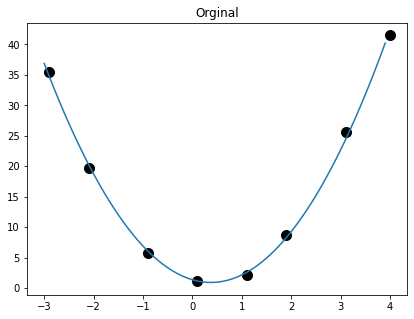

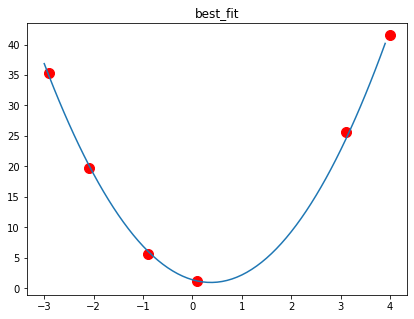

In [61]:
compare_list = []
f_abc = []

import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from scipy.integrate import quad

def integrand(x, a, b, c, a1, b1, c1):
    return ((a * (x**2) + b * x + c) - (a1 * (x**2) + b1 * x + c1))**2

pt = [[-2.9, 35.4],[-2.1, 19.7],[-0.9, 5.7],[0.1, 1.2],[1.1, 2.1],[1.9, 8.7],[3.1, 25.7],[4.0, 41.5]]
combi = combinations(pt, 6)
list_combi = list(combi)
# print(list_combi[5])

x1=[]
y1=[]

for i in range(0,8):
    x1.append(pt[i][0])
    y1.append(pt[i][1])
a1, b1, c1 = np.polyfit(x1, y1, 2)
f_abc.append(a1)
f_abc.append(b1)
f_abc.append(c1)

result = []
for i in range(0, 28):
    x_sam = []
    y_sam = []
    abc_list = []
    for j in range(0, 6):
        x_sam.append(list_combi[i][j][0])
        y_sam.append(list_combi[i][j][1])
    a_sam, b_sam, c_sam = np.polyfit(x_sam, y_sam, 2)
    abc_list.append(a_sam)
    abc_list.append(b_sam)
    abc_list.append(c_sam)
    compare_list.append(abc_list)
    best_fit = quad(integrand, -2.9, 4, args=(f_abc[0], f_abc[1], f_abc[2], compare_list[i][0], compare_list[i][1], compare_list[i][2]))
    result.append(best_fit[0])
print(result)
    
min_index = result.index(min(result)) # 가장 작은 인덱스 번호
# print(min_index)
# print(compare_list[min_index]) # 가장 작은 인덱스의 abc값


fit_x1 = np.arange(-3, 4, 0.1)
fit_y1 = a1*fit_x1**2 + b1*fit_x1 + c1

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y1, c = 'black', s= 100)
plt.plot(fit_x1, fit_y1)
plt.title("Orginal")
plt.show()

fit_x2 = np.arange(-3, 4, 0.1)
fit_y2 = compare_list[min_index][0]*fit_x2**2 + compare_list[min_index][1]*fit_x2 + compare_list[min_index][2]

best_x = []
best_y = []

for i in list_combi[min_index]:
    best_x.append(i[0])
    best_y.append(i[1])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.scatter(best_x, best_y, c = 'red', s= 100)
plt.plot(fit_x2, fit_y2)
plt.title("best_fit")
plt.show()